# Introducción

Como vimos en el primer notebook, un árbol de regresión lineal tuvo problemas para hacer una predicción para predecir el peso de los peces. Por ende, en este ejercicio utilizamos los métodos de ensamble Bagging, AdaBoost y Random Forest para obtener un mejor desempeño.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Antes de proceder al modelo, vamos a eliminar la columna de especies ya que es categórica.

In [3]:
df.drop(["Species"], axis=1, inplace=True)
df

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


# Entrenamiento de Modelos

Antes de proceder, vale la pena recordar cual es el estado de nuestro proyecto:

Sabemos ya que una árbol de regresión no es mejor que una regresión lineal simple. Por ende, utilizaremos tres enfoques diferentes. Cada uno crear un número adicionales de árboles y utiliza métodos distintos para resoler este problema.

* Bagging que promedia los resultados dados por los árboles.
* Random Forest que es similar a bagging, pero que crea árboles diferentes para disminuir el error en ellos.
* Boosting que crea árboles que compensar los errores entre ellos.

Con esto en mente, vamos a entrenar nuestros modelos como de costumbre,

In [4]:
X = df.drop(["Weight"], axis=1)
y = df["Weight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [5]:
bagging = BaggingRegressor()
bagging.fit(X_train, y_train)

BaggingRegressor()

In [6]:
boosting = AdaBoostRegressor()
boosting.fit(X_train, y_train)

AdaBoostRegressor()

In [7]:
random = RandomForestRegressor()
random.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
y_bagging_predict = bagging.predict(X_test)
y_boosting_predict = boosting.predict(X_test)
y_random_predict = random.predict(X_test)

Ahora vamos a medir la precisión de nuestros modelos recordando que una regresión lineal simple nos dió un error cuadrado promedio de 26796 y un error absoluto de 129.

In [9]:
mse = mean_squared_error(y_test, y_bagging_predict)
ase = mean_absolute_error(y_test, y_bagging_predict)

print(round(mse))
print(round(ase))

6039
49


In [10]:
mse = mean_squared_error(y_test, y_boosting_predict)
ase = mean_absolute_error(y_test, y_boosting_predict)

print(round(mse))
print(round(ase))

4738
55


In [11]:
mse = mean_squared_error(y_test, y_random_predict)
ase = mean_absolute_error(y_test, y_random_predict)

print(round(mse))
print(round(ase))

4338
45


En este caso, hemos visto que los tres métodos han dado mucho mejores resultados que una regresión lineal simple. Como regla general, hay que recordar que un solo árbol de decisión hace malas predicciones. Varios árboles de decisión hacen excelentes predicciones.

En este proyecto en particular, Bagging y Random Forests dieron mejor resultados. Hay que recordar que Boosting es una herramienta potente cuando lidiamos con data sets más grandes, ya que mejor exponencialmente a medida que genera más árboles de decisión.

Finalmente, podemos graficar nuevamente los residuales para ver el resultado de nuestros modelos.

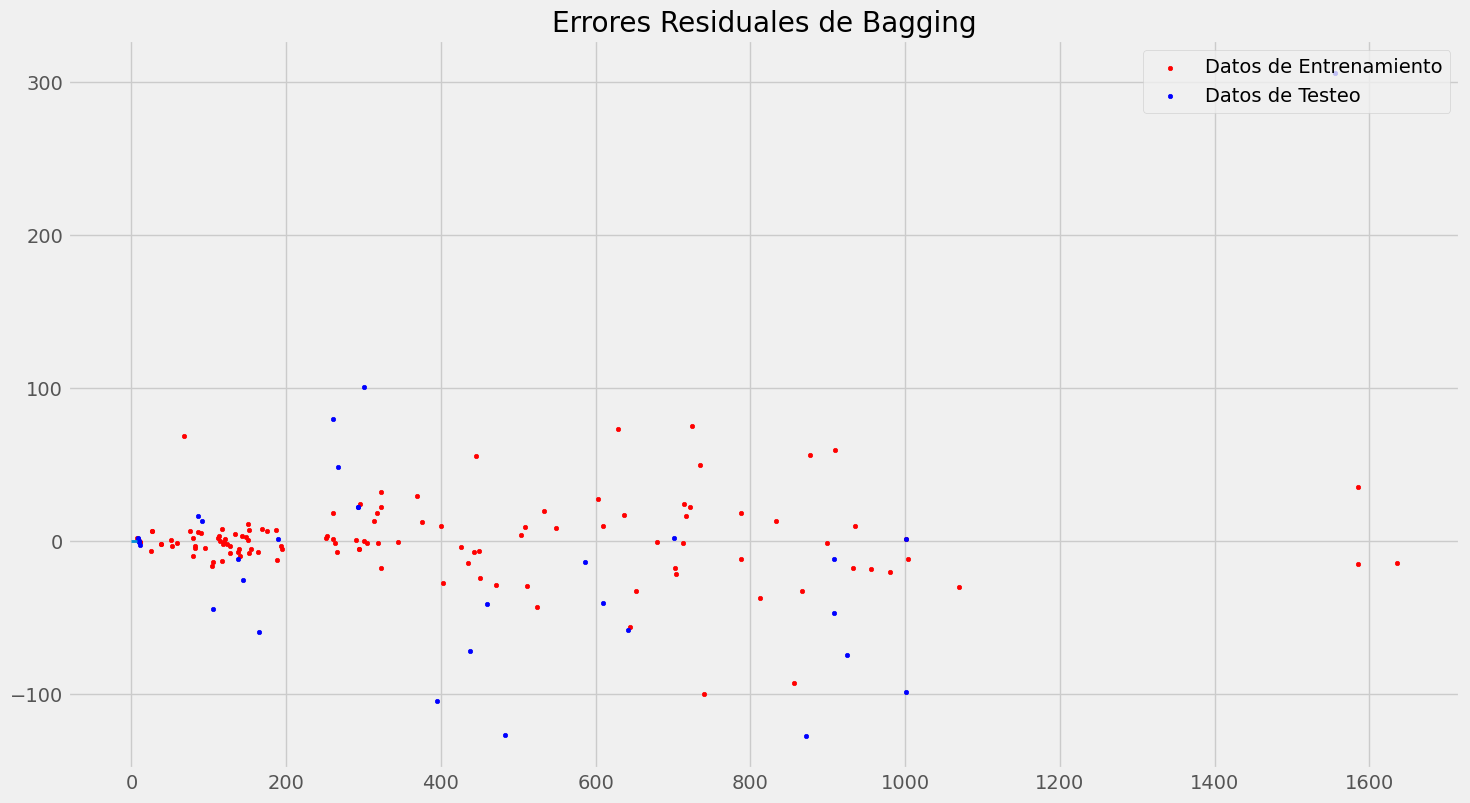

In [12]:
plt.style.use('fivethirtyeight')
plt.scatter(bagging.predict(X_train), bagging.predict(X_train) - y_train,
            color = "red", s = 10, label = 'Datos de Entrenamiento')
plt.scatter(bagging.predict(X_test), bagging.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Datos de Testeo')
plt.hlines(y = 0, xmin = 0, xmax = 7, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Errores Residuales de Bagging")

plt.show()

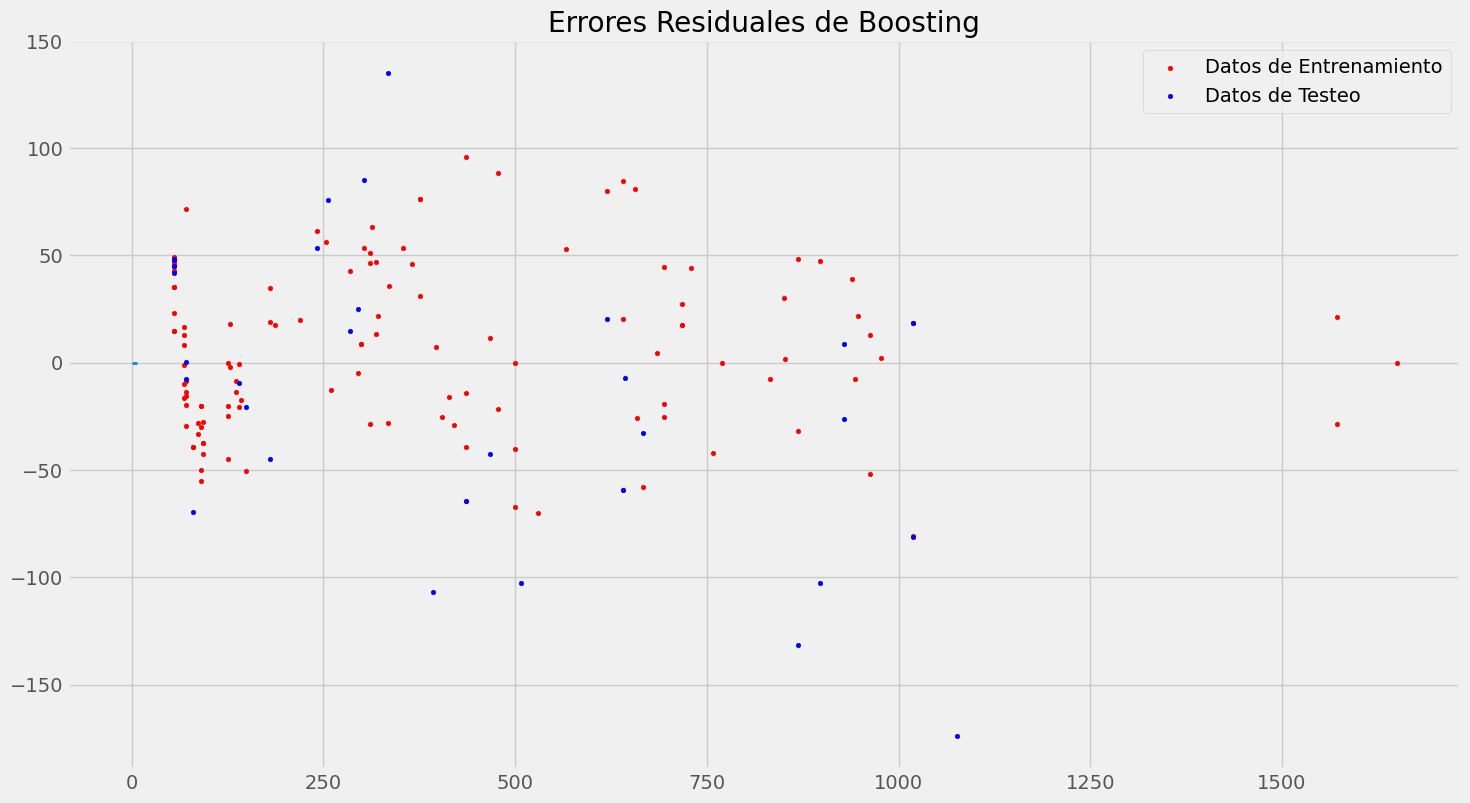

In [13]:
plt.style.use('fivethirtyeight')
plt.scatter(boosting.predict(X_train), boosting.predict(X_train) - y_train,
            color = "red", s = 10, label = 'Datos de Entrenamiento')
plt.scatter(boosting.predict(X_test), boosting.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Datos de Testeo')
plt.hlines(y = 0, xmin = 0, xmax = 7, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Errores Residuales de Boosting")

plt.show()